In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv('D:\Data Sets/titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
x=data.drop(columns=['Cabin','Ticket'], axis=1)

In [8]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
survived_map = {0: 'No', 1: 'Yes'}
x['Survived'] = x['Survived'].map(survived_map)

# PClass map
pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
x['Pclass'] = x['Pclass'].map(pclass_map)

# Embarkation port map
port_map = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
x['Embarked'] = x['Embarked'].map(port_map)

In [70]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Southampton
1,2,Yes,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Cherbourg
2,3,Yes,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton
3,4,Yes,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton
4,5,No,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Southampton


# Working with Sex

In [13]:
x.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
x.groupby('Sex').Survived.value_counts()

Sex     Survived
female  Yes         233
        No           81
male    No          468
        Yes         109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

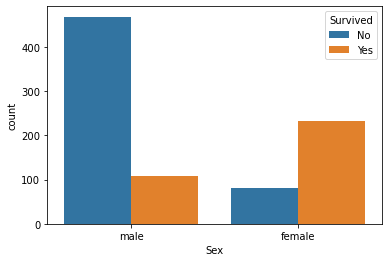

In [15]:
sns.countplot(x='Sex',hue='Survived', data = x)

In [19]:
x.groupby('Sex').Pclass.value_counts()

Sex     Pclass      
female  Lower Class     144
        Upper Class      94
        Middle Class     76
male    Lower Class     347
        Upper Class     122
        Middle Class    108
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

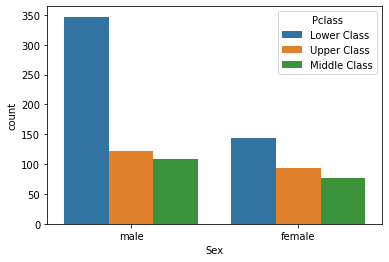

In [20]:
sns.countplot(x='Sex',hue='Pclass',  data=x)

In [75]:
x.groupby('Sex').Embarked.value_counts()

Sex     Embarked   
female  Southampton    203
        Cherbourg       73
        Queenstown      36
male    Southampton    441
        Cherbourg       95
        Queenstown      41
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

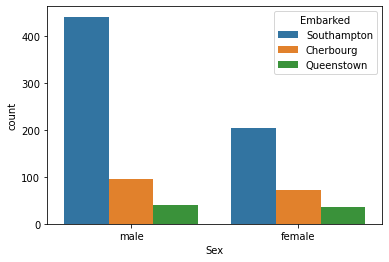

In [82]:
sns.countplot(x='Sex',hue='Embarked',data=x)

# Working with Age

In [81]:
x.value_counts('Age')

Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Length: 88, dtype: int64

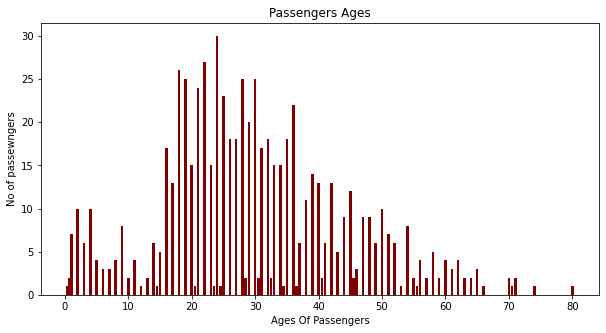

In [23]:
Ages=x.value_counts('Age')
## Visualization of the Ages
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Ages.index,Ages.values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Ages Of Passengers")
plt.ylabel("No of passewngers")
plt.title("Passengers Ages")
plt.show()

In [24]:
# min age passenger to survive
x[(x['Survived']=='Yes')&(x['Age']==x['Age'].min())][['Pclass','PassengerId','Name','Age','Sex']]

,Pclass,PassengerId,Name,Age,Sex
803,Lower Class,804,"Thomas, Master. Assad Alexander",0.42,male


In [25]:
# mix age passenger to survive
x[(x['Survived']=='Yes')&(x['Age']==x['Age'].max())][['Pclass','PassengerId','Name','Age','Sex']]

,Pclass,PassengerId,Name,Age,Sex
630,Upper Class,631,"Barkworth, Mr. Algernon Henry Wilson",80.0,male


In [26]:
#Poorest person on ship
x[x['Fare']==x['Fare'].min()][['PassengerId','Name','Sex','Age','Fare','Survived','Pclass']]

,PassengerId,Name,Sex,Age,Fare,Survived,Pclass
179,180,"Leonard, Mr. Lionel",male,36.0,0.0,No,Lower Class
263,264,"Harrison, Mr. William",male,40.0,0.0,No,Upper Class
271,272,"Tornquist, Mr. William Henry",male,25.0,0.0,Yes,Lower Class
277,278,"Parkes, Mr. Francis ""Frank""",male,NaN,0.0,No,Middle Class
302,303,"Johnson, Mr. William Cahoone Jr",male,19.0,0.0,No,Lower Class
413,414,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,No,Middle Class
466,467,"Campbell, Mr. William",male,NaN,0.0,No,Middle Class
481,482,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0.0,No,Middle Class
597,598,"Johnson, Mr. Alfred",male,49.0,0.0,No,Lower Class
633,634,"Parr, Mr. William Henry Marsh",male,NaN,0.0,No,Upper Class


In [27]:
# richest person on ship
x[x['Fare']==x['Fare'].max()][['PassengerId','Name','Sex','Age','Fare','Survived','Pclass']]

,PassengerId,Name,Sex,Age,Fare,Survived,Pclass
258,259,"Ward, Miss. Anna",female,35.0,512.3292,Yes,Upper Class
679,680,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,Yes,Upper Class
737,738,"Lesurer, Mr. Gustave J",male,35.0,512.3292,Yes,Upper Class


In [61]:
Types_of_class= x.value_counts('Pclass',sort=True)
print(Types_of_class)

Pclass
Lower Class     491
Upper Class     216
Middle Class    184
dtype: int64


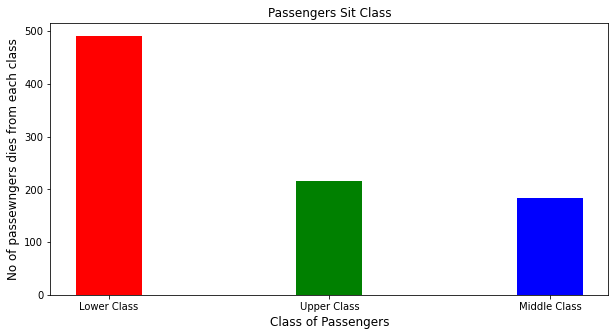

In [62]:
## Visualization of the Ages
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Types_of_class.index,Types_of_class.values, 
        width = 0.3,color=['Red','Green','Blue'])
 
plt.xlabel("Class of Passengers" ,fontsize=12)
plt.ylabel("No of passewngers dies from each class",fontsize=12)
plt.title("Passengers Sit Class")
plt.show()

In [28]:
x.groupby('Pclass').Survived.value_counts()

Pclass        Survived
Lower Class   No          372
              Yes         119
Middle Class  No           97
              Yes          87
Upper Class   Yes         136
              No           80
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

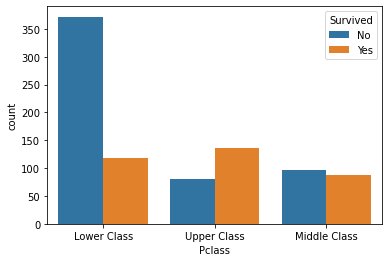

In [34]:
sns.countplot(x='Pclass',hue='Survived', data=x)

In [29]:
# family size
x['FamilySize'] = x['SibSp'] + x['Parch']

Survived  Embarked   
Yes       Southampton    217
          Cherbourg       93
          Queenstown      30
Name: Embarked, dtype: int64

#  Delete rows where passenger doesnt survive

In [41]:
not_survive= x[x['Survived'] == 'No'].index
x.drop (not_survive, inplace= True)

In [42]:
x.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
1,2,Yes,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Cherbourg,1
2,3,Yes,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Southampton,0
3,4,Yes,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Southampton,1
8,9,Yes,Lower Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,Southampton,2
9,10,Yes,Middle Class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,Cherbourg,1


# Catagorise age into bins

In [43]:
age_labels =['0-9', '10-19','20-29','30-39','40-49','50-59', '60-69', '70-79']
x['Age_grupe']=pd.cut(x.Age, range(0,81,10), right=False, labels=age_labels)

In [44]:
x.drop(['SibSp','Parch'],axis=1,inplace=True)

<AxesSubplot:xlabel='Age_grupe', ylabel='count'>

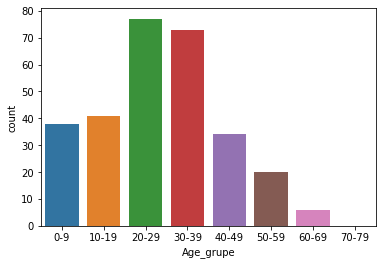

In [45]:
import seaborn as sns
sns.countplot(x='Age_grupe', data=x)

<AxesSubplot:xlabel='Fare'>

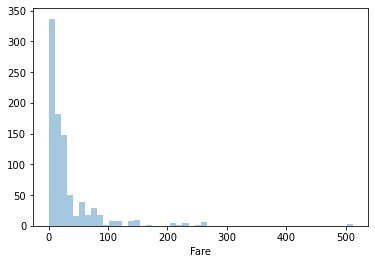

In [69]:
sns.distplot(x['Fare'],kde=False)

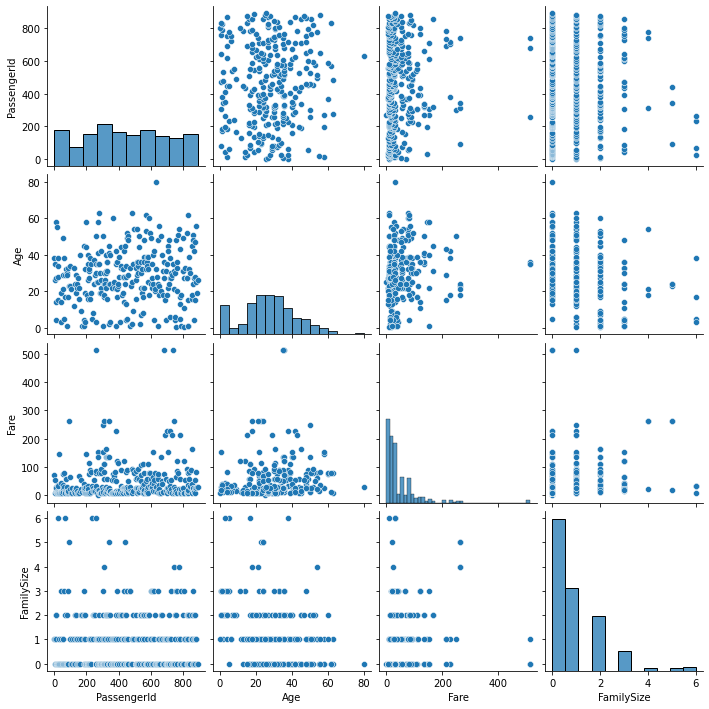

In [46]:
sns.pairplot(x)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

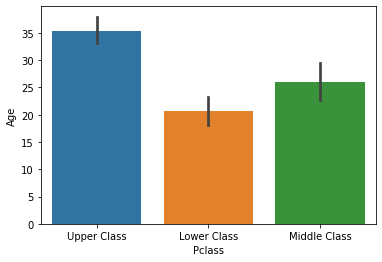

In [47]:
sns.barplot(x='Pclass',y='Age',data=x)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

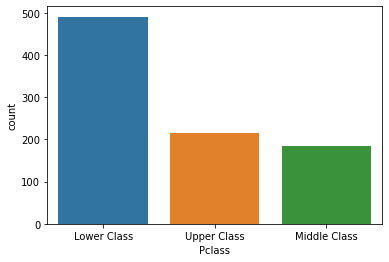

In [72]:
sns.countplot(x='Pclass', data=x)

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

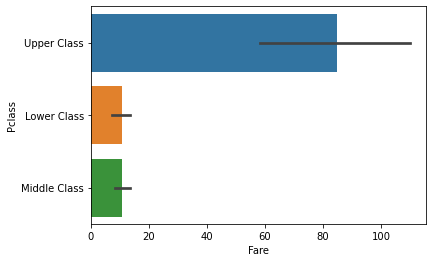

In [48]:
sns.barplot(y='Pclass',x='Fare',data=x,estimator=np.std)

In [49]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Age_grupe
1,2,Yes,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,1,30-39
2,3,Yes,Lower Class,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton,0,20-29
3,4,Yes,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton,1,30-39
8,9,Yes,Lower Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southampton,2,20-29
9,10,Yes,Middle Class,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg,1,10-19


<AxesSubplot:xlabel='FamilySize', ylabel='Age_grupe'>

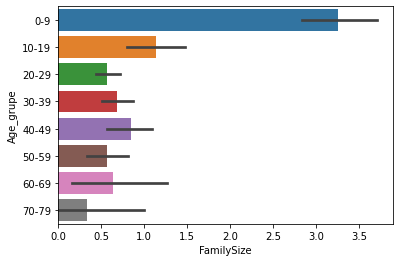

In [78]:
sns.barplot(x='FamilySize',y='Age_grupe',data=x)

<AxesSubplot:xlabel='Fare', ylabel='Age_grupe'>

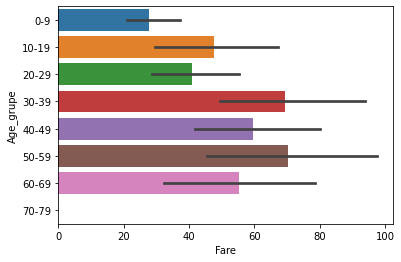

In [50]:
sns.barplot(x='Fare',y='Age_grupe',data=x)

<AxesSubplot:xlabel='Age_grupe', ylabel='Fare'>

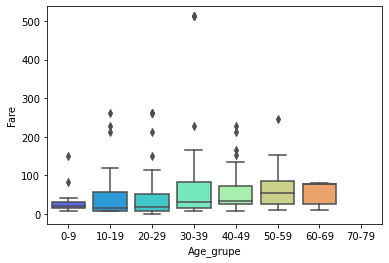

In [51]:
sns.boxplot(x="Age_grupe", y="Fare", data=x,palette='rainbow')

<AxesSubplot:xlabel='Age_grupe', ylabel='FamilySize'>

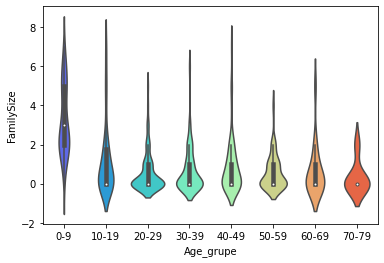

In [82]:
sns.violinplot(x="Age_grupe", y="FamilySize", data=x,palette='rainbow')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

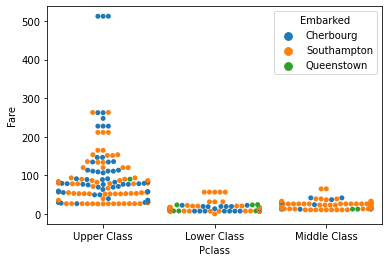

In [53]:
sns.swarmplot(x="Pclass", y="Fare", data=x,hue='Embarked')

In [54]:
x['Embarked'].value_counts()

Southampton    217
Cherbourg       93
Queenstown      30
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

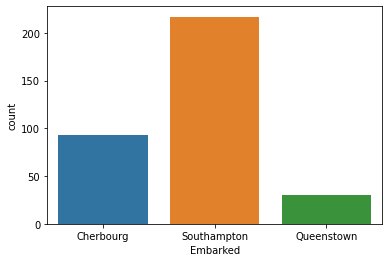

In [55]:
# which area has most number of survivors
sns.countplot(x='Embarked',data=x)